In [277]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import json

In [278]:
import tensorflow as tf

from tensorflow.keras.layers import Embedding, Dense, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


In [279]:
with open("tokenizer.json", "r") as jsonfile:
    tokenizer = json.load(jsonfile)

tokenizer = tf.keras.preprocessing.text.tokenizer_from_json(tokenizer)

In [280]:
with open("tituloTratado.csv", "r") as csvfile:
    titulos = np.genfromtxt(csvfile, delimiter=",")
    titulos = titulos.astype(np.int32)

In [281]:
with open("conteudoTratado.csv", "r") as csvfile:
    conteudos = np.genfromtxt(csvfile, delimiter=",")
    conteudos = conteudos.astype(np.int32)

In [282]:
size = len(conteudos)

xTrain = conteudos[0:int(size*0.8)]
xTest = conteudos[int(size*0.8):]

yTrain = titulos[0:int(size*0.8)]
yTest = titulos[int(size*0.8):]

In [283]:
vocab = len(tokenizer.word_index)

In [284]:
maxTitle = max(len(tokens) for tokens in titulos)
maxContent = max(len(tokens) for tokens in conteudos)

In [285]:
model = Sequential()

model.add(Embedding(vocab, 128, input_length = maxContent))
model.add(Conv1D(32, 3, activation = 'relu'))
model.add(GlobalMaxPooling1D(data_format="channels_first"))
model.add(Dense(maxTitle, activation = "softmax"))


In [286]:
model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics=["accuracy"])

In [288]:
neuralNetwork = model.fit(xTrain, yTrain, validation_data=(xTest, yTest), epochs=100, batch_size=1)

Epoch 1/100
78/78 [==============================] - 2s 11ms/step - loss: 218278.8750 - accuracy: 0.1154 - val_loss: 1799235.2500 - val_accuracy: 0.0000e+00
Epoch 2/100
78/78 [==============================] - 1s 10ms/step - loss: 6060115.0000 - accuracy: 0.0897 - val_loss: 29516388.0000 - val_accuracy: 0.0000e+00
Epoch 3/100
78/78 [==============================] - 1s 10ms/step - loss: 28230948.0000 - accuracy: 0.0897 - val_loss: 108073320.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
78/78 [==============================] - 1s 10ms/step - loss: 71254656.0000 - accuracy: 0.0897 - val_loss: 232589728.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
78/78 [==============================] - 1s 10ms/step - loss: 156351616.0000 - accuracy: 0.0897 - val_loss: 470119520.0000 - val_accuracy: 0.0000e+00
Epoch 6/100
78/78 [==============================] - 1s 10ms/step - loss: 285161632.0000 - accuracy: 0.0897 - val_loss: 869710976.0000 - val_accuracy: 0.0000e+00
Epoch 7/100
78/78 [===================

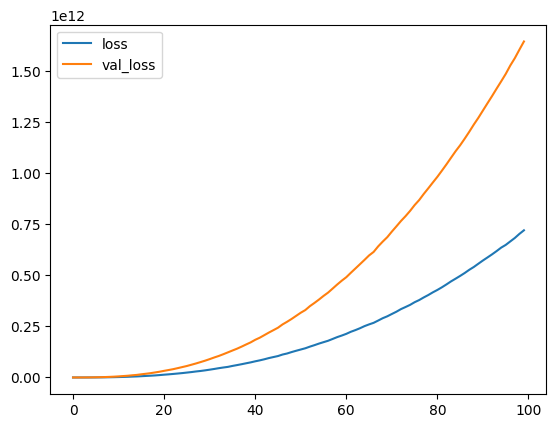

In [293]:
plt.plot(neuralNetwork.history['loss'], label = 'loss')
plt.plot(neuralNetwork.history['val_loss'], label = 'val_loss')
plt.legend()

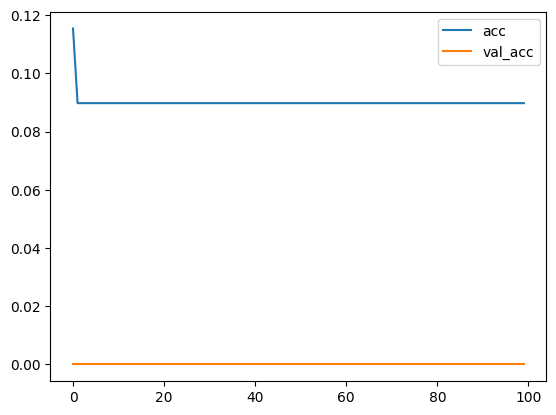

In [294]:
plt.plot(neuralNetwork.history["accuracy"], label = 'acc')
plt.plot(neuralNetwork.history["val_accuracy"], label = 'val_acc')
plt.legend()

In [295]:
xTest[1]

array([   3, 2313, 6363, ...,    0,    0,    0])

In [299]:
model.predict(xTest[0:20])

1/1 [==============================] - 0s 56ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.

In [276]:
yTest[0:20]

array([[1743,  226, 1753, 2310,  676, 1754,    5,  534,    7,  993,    0,
           0,    0,    0,    0],
       [1396, 7352,    2, 1320,    1,  867,  131, 3412,    9,  816,    3,
        1388,    0,    0,    0],
       [2270,   11, 1647, 1398,    4,  603,  677,  530, 7354,    4, 2296,
           0,    0,    0,    0],
       [ 419, 1399,  811, 3438,   12, 1759,  109,  860,    1, 2329,    0,
           0,    0,    0,    0],
       [  11,  960, 1323,  226, 1753, 7357,    3,  676,    7,  993, 3399,
           0,    0,    0,    0],
       [3214,    1, 3446,  619, 1912,    5,  530, 1761,   53, 3448,    7,
         678,    0,    0,    0],
       [3451,  600,   21,  301,    9, 7360, 1764, 1184,    1, 6635,    0,
           0,    0,    0,    0],
       [1918, 1173, 1765, 7364,    9, 1898, 7365,    9,    2, 1355, 3468,
           0,    0,    0,    0],
       [6701,   22, 1768, 7367,    4, 3334,  811,  106,    4, 3469,    0,
           0,    0,    0,    0],
       [ 754, 1771, 1404,  195, 7369,